# Coursework 1: Image Filtering

In this coursework we will explore some basic image filters used in computer vision. The corresponding lectures are Lectures 3 and 4 on image filtering and edge detection.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

In [1]:
# Import libaries
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noisy
import scipy
import scipy.signal
import math
import time

# 1. Moving average filter (20 points)

**Task:** Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3, 5x5 and 9x9 respectively. Display the filtering results and comment on the results.

Please design the filter by yourself. Then, 2D image filtering can be performed using the function `scipy.signal.convolve2d()`.

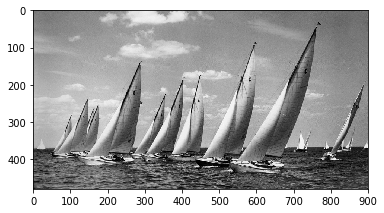

In [2]:
# Read the image
image = imageio.imread('boat.png')
plt.imshow(image, cmap='gray')

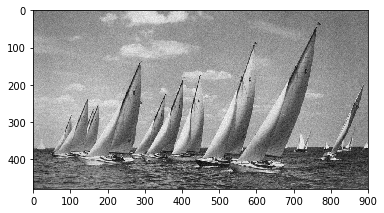

In [3]:
# Corrupt the image with Gaussian noise
image_noisy = noisy.noisy(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')

**Note:** from now on, please use the noisy image as the input for the filters.

## 1.1 Filter the noisy image with a 3x3 moving average filter (5 points)

All the filters are designed similarly, so I use a helper function to produce them:

In [5]:
def filter(size):
    weight = 1 / (size * size)
    return np.full((size, size), weight)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


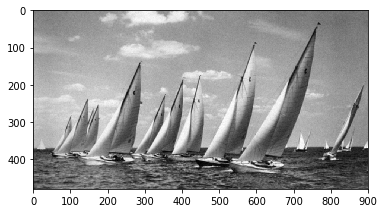

In [6]:
# Design the filter h
h = filter(3)

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.2 Filter the noisy image with a 5x5 moving average filter (5 points)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


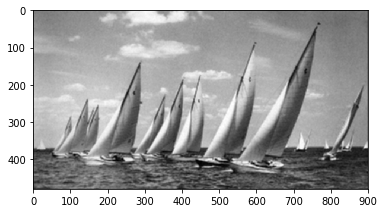

In [8]:
# Design the filter h
h = filter(5)

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.3 Filter the noisy image with a 9x9 moving average filter (5 points)

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


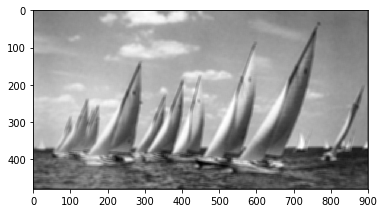

In [9]:
# Design the filter h
h = filter(9)

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.4 Comment on the filtering results when different window sizes are used (5 points)

As the filter size increases, the noisiness is increasingly removed, but the image becomes progressively blurrier.


Note: the filters have an infinitesimal weight loss, due to floating point rounding.

TODO: add more from local github at home

# 2. Edge detection (35 points)

**Task:** Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters. Display the Sobel magnitude images and comment.

## 2.1 Implement 3x3 Sobel filters and convolve with the noisy image (5 points)

[[1, 0, -1], [2, 0, -2], [1, 0, -1]]
[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]


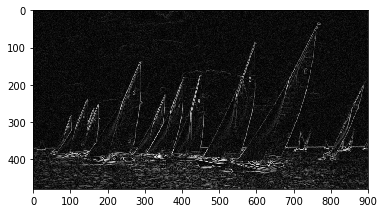

In [10]:
# Design the Sobel filters
h_sobel_x = [[1, 0, -1],
             [2, 0, -2],
             [1, 0, -1]]
h_sobel_y = [[ 1,  2,  1],
             [ 0,  0,  0], 
             [-1, -2, -1]]

# Print the filters
print(h_sobel_x)
print(h_sobel_y)

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_noisy, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_noisy, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.2 Design a 2D Gaussian filter (5 points)

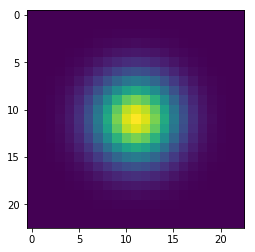

In [25]:
# Returns the gaussian function evaluated at (i, j) with parameter sigma.
def gaussian_func(sigma, i, j):
    sigma_sq = sigma * sigma    
    return math.exp(-(i * i + j * j) / (2 * sigma_sq)) / (2 * math.pi * sigma_sq)

# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    # The filter radius is 3.5 times sigma
    rad = int(math.ceil(3.5 * sigma))
    
    # Adjust gaussian evaluation based on radius.
    def adjusted_gaussian(i, j):
        return gaussian_func(sigma, i - rad, j - rad)
        
    sz = 2 * rad + 1
    h = np.fromfunction(np.vectorize(adjusted_gaussian), (sz, sz))
    return h

# Display the Gaussian filter when sigma = 3 pixel
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

## 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels) before applying the Sobel filters (5 points)

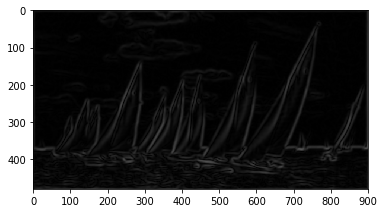

In [26]:
# Perform Gaussian smoothing before Sobel filtering
sigma = 3
h = gaussian_filter_2d(sigma)
image_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) before applying the Sobel filters. Evaluate the computational time for Gaussian smoothing. (5 points)

The Gaussian filter of size 𝜎 as implemented above has radius $~3.5\sigma$, size $~7\sigma$, therefore has in total $K = ~49\sigma^2$ elements. 

Running a Gaussian smoothing on an image matrix $I$ of dimension $m$ x $n$:
- for each of the $mn$ elements in the image, evaluate the output element: $K$ multiplications, $K$ additions
- in total, $2*K*m*n = ~98mn\sigma^2$  operations

It takes 2.190065 seconds for performing Gaussian smoothing.


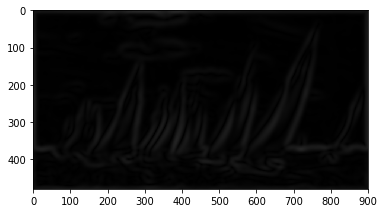

In [27]:
# Create the Gaussian filter
sigma = 7
h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same')
duration = time.time() - start
print('It takes {0:.6f} seconds for performing Gaussian smoothing.'.format(duration))

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.5 Design 1D Gaussian filters along x-axis and y-axis respectively. (5 points)

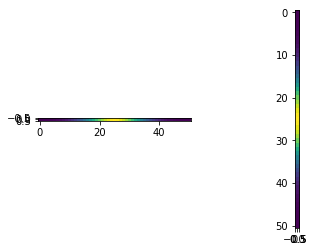

In [38]:
# Returns the 1-dimentional gaussian function evaluated at i with parameter sigma.
def gaussian_func_1d(sigma, i):
    return math.exp(-(i * i) / (2 * sigma * sigma)) / (math.sqrt(2 * math.pi) * sigma)

# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    # The filter radius is 3.5 times sigma
    rad = int(math.ceil(3.5 * sigma))
    
    # Adjust 1D gaussian evaluation based on radius.
    def adjusted_gaussian_1d(i):
        return gaussian_func_1d(sigma, i - rad)
        
    sz = 2 * rad + 1
    h = np.empty(sz)
    for i in range(0, sz):
        h[i] = adjusted_gaussian_1d(i)
    
    return h

# Display the Gaussian filters when sigma = 7 pixel
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)
h_x = np.expand_dims(h_x, axis=0)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma)
h_y = np.expand_dims(h_y, axis=-1)

# Display the filters
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

## 2.6 Perform Gaussian smoothing (sigma = 7 pixels) as two separable filters, then apply the Sobel filters. Evaluate the computational time for separable Gaussian filtering. (5 points)

The 1D Gaussian filter of size 𝜎 as implemented above has radius $~3.5\sigma$ and $~7\sigma$ elements. 

The computational time of Gaussian smoothing by convolutiong with two 1D Gaussian filters, for an image matrix $I$ of dimension $m$ x $n$, is $mn* 7\sigma$ for the first convolution, and $mn* 7\sigma$. 

Running a Gaussian smoothing on an image matrix $I$ of dimension $m$ x $n$ with two separable 1D filters implies $2$ convolutions between a $m$ x $n$ matrix and a $~7\sigma$ element 1D matrix
- for each of the $mn$ elements in the image, evaluate the output element: $~7\sigma$ multiplications, $~7\sigma$ additions
- in total, $~14mn\sigma$  operations
- 

It takes 0.163980 seconds for performing Gaussian smoothing.


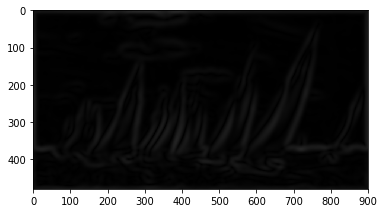

In [39]:
# Perform separable Gaussian smoothing before Sobel filtering
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, mode='same')
duration = time.time() - start
print('It takes {0:.6f} seconds for performing Gaussian smoothing.'.format(duration))

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.7 Comment on the filtering results (5 points)

Please put your comments here.

# 3. Laplacian filter (15 points)

**Task:** Perform Laplacian filtering and Laplacian of Gaussian filtering. Display the results and comment.

## 3.1 Implement a 3x3 Laplacian filter (5 points)

In [ ]:
# Design the filter
h = []

# Laplacian filtering
lap = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Display the results
plt.imshow(lap, cmap='gray')

## 3.2 Implement the Laplacian of Gaussian filter ($\sigma$ = 3 pixel) (5 points)

In [ ]:
# Design the Gaussian filter
sigma = 3

# The Gaussian filter along x-axis
h_x = gaussian_filter_1d(sigma)
h_x = np.expand_dims(h_x, axis=0)

# The Gaussian filter along y-axis
h_y = gaussian_filter_1d(sigma)
h_y = np.expand_dims(h_y, axis=-1)

# Gaussian smoothing
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, mode='same')

# Design the Laplacian filter
h = []

# Laplacian filtering
lap = scipy.signal.convolve2d(image_smoothed, h, mode='same')
plt.imshow(lap, cmap='gray')

## 3.3 Comments on the filtering results (5 points)

Please put your comments here.

# 4. Survey: How long does it take you to complete the coursework?

Put your answer here.